### **主題：啤酒評論評分預測**
### **說明：**
這是一份包含對不同種啤酒的評鑑資料集，最終目標是以其中的文字評論為輸入，建構 BERT 模型，評估其各項屬性(apperance, aroma, overall, palate, taste)得分。
### **題目：**
1. 在各項屬性中的評分別為 0, 0.5, ..., 5 的分數，請依照其分布狀況，評估應該將其分成多少群目標類別來做預測。例如: 0\~2 分為一群、2\~4 分為一群、...
2. 請統計每個評論的長度為多少，並請依照其長度評估出 BERT 模型所使用的最大長度。
##### **提示: 最大不可超過 BERT 長度限制 512**

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_json(os.path.join('data', 'train_set.json'), encoding='utf-8')
test = pd.read_json(os.path.join('data', 'test_set.json'), encoding='utf-8')

train = train.append(test).reset_index(drop=True)

In [2]:
train.iloc[0]

index                                                             6870
beer/ABV                                                           7.5
beer/beerId                                                      40765
beer/brewerId                                                    16791
beer/name                                    Otro Mundo Strong Red Ale
beer/style                                          English Strong Ale
review/appearance                                                  3.5
review/aroma                                                       3.5
review/overall                                                       3
review/palate                                                      3.5
review/taste                                                       3.5
review/text          From BeerAdvocate Magazine Volume II, Issue II...
review/timeStruct    {'min': 31, 'hour': 2, 'mday': 24, 'sec': 57, ...
review/timeUnix                                             1259029917
user/a

Text(0.5, 0, 'appearance score')

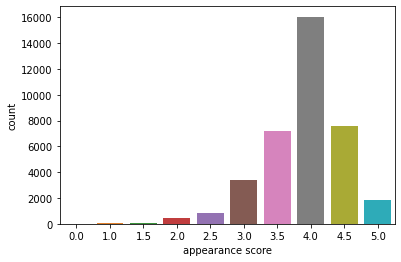

In [3]:
# appearance
sns.countplot(x=train['review/appearance'])
plt.xlabel('appearance score')

Text(0.5, 0, 'aroma score')

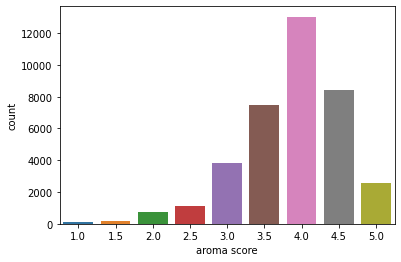

In [4]:
# aroma
sns.countplot(x=train['review/aroma'])
plt.xlabel('aroma score')

Text(0.5, 0, 'overall score')

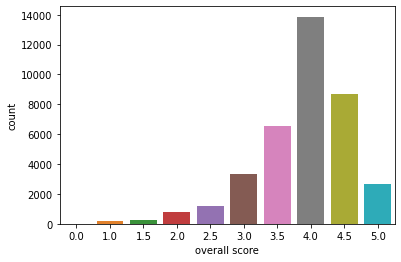

In [5]:
# overall
sns.countplot(x=train['review/overall'])
plt.xlabel('overall score')

Text(0.5, 0, 'palate score')

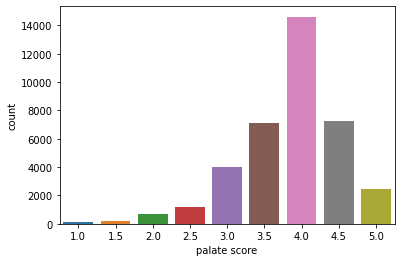

In [6]:
# palate
sns.countplot(x=train['review/palate'])
plt.xlabel('palate score')

Text(0.5, 0, 'taste score')

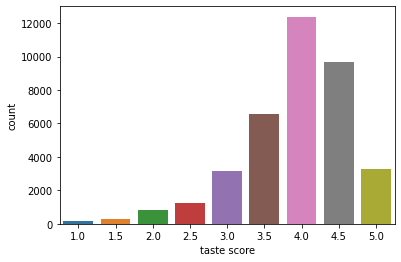

In [7]:
# taste
sns.countplot(x=train['review/taste'])
plt.xlabel('taste score')

#### **#1 決定將其分成多少群目標類別來做預測**
由上面的分布圖可以觀察到，各屬性大部分的評分都落在 4.0，為了讓各類別
的資料數量不要相差太多，這邊將依分數 1.0\~3.5、4.0、4.5\~5.0 分成三個類別 1, 2, 3

In [8]:
def score_to_rate(score):
    if score <= 3.5:
        return 1
    if score == 4:
        return 2
    return 3

for aspect in ['appearance', 'aroma', 'overall', 'palate', 'taste']:
    train[f"review_{aspect}"] = train[f"review/{aspect}"].apply(score_to_rate)

Text(0.5, 0, 'appearance score')

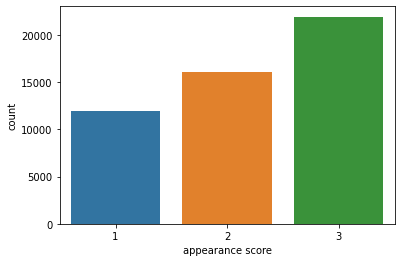

In [9]:
# appearance
sns.countplot(x=train['review_appearance'])
plt.xlabel('appearance score')

Text(0.5, 0, 'aroma score')

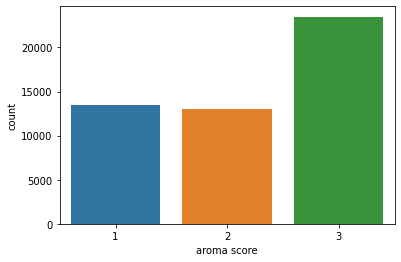

In [10]:
# aroma
sns.countplot(x=train['review_aroma'])
plt.xlabel('aroma score')

Text(0.5, 0, 'overall score')

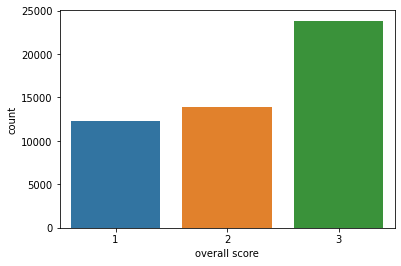

In [11]:
# overall
sns.countplot(x=train['review_overall'])
plt.xlabel('overall score')

Text(0.5, 0, 'palate score')

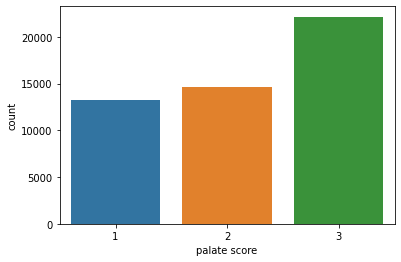

In [12]:
# palate
sns.countplot(x=train['review_palate'])
plt.xlabel('palate score')

Text(0.5, 0, 'taste score')

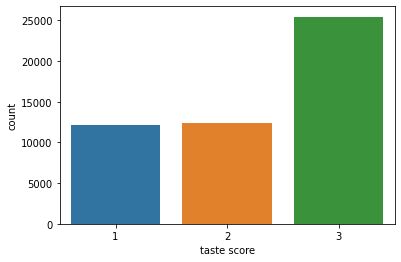

In [13]:
# taste
sns.countplot(x=train['review_taste'])
plt.xlabel('taste score')

#### **#2 決定合適的BERT最大長度(max sequence length)**
先看看資料集中每一筆評語的長度為多少，這邊要特別注意，BERT 在處理英文語句時是以一個單字為一個 token，而非一個字母，所以並不能純粹以len()來評估長度。<br />
準確的做法應該是要以 BERT Tokenizer 來實作，然而這邊僅僅需要以空格來分割大約評估即可，與 Tokenizer 的結果並不會差太多。

In [14]:
def get_len(text):
    return len(str(text).split(' '))

train['text_length'] = train['review/text'].apply(get_len)

In [15]:
train['text_length'].describe([0.8, 0.9, 0.95])

count    50000.000000
mean       125.502080
std         68.986175
min          1.000000
50%        109.000000
80%        167.000000
90%        211.000000
95%        256.000000
max        886.000000
Name: text_length, dtype: float64

這邊發現大部分(95%)的語句都分布在 256 個自之內，因此決定將 BERT max sequence length 設定為 256 個字。

In [16]:
train_size = int(len(train) * 0.9)
train = train.sample(frac=1).reset_index(drop=True)
train_data = train.iloc[:train_size]
test_data = train.iloc[train_size:].reset_index(drop=True)

train_data.to_json(os.path.join('data', 'train_set.json'), orient='records')
test_data.to_json(os.path.join('data', 'test_set.json'), orient='records')